<a href="https://colab.research.google.com/github/cybertron002/TSF-GRIPJUNE21/blob/main/TASK_1_Study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBJECTIVE
● Predicting the percentage of an student based on the no. of study hours.

###Author 
Somesh Anand


In [ ]:
# Importing all libraries required for this task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error



In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)   #Reading data

df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



 Check if there any null value in the Dataset


In [ ]:
df.isnull == True

False

##Scatter Plot for visualising data

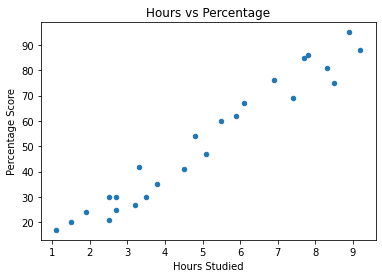

In [ ]:
df.plot(kind='scatter', x='Hours', y='Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


##Data preprocessing

In [ ]:
#divide the data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [ ]:
#SPLITTING DATA INTO TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

##BUILDING MODEL
From the scatter plot, we can say that there is linear relation between Hours and Scores

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

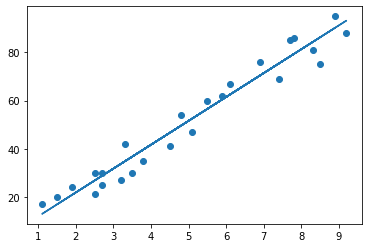

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

###Predicting 
We have build our model and now we will predict using the model.

In [ ]:
print(X_test) # Testing data (Study hours)
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting own data

In [ ]:
Study_hours = [[9.25]]
own_pred = regressor.predict(Study_hours)
print("No of Hours = 9.25")
print("Predicted Score = ",own_pred[0])

No of Hours = 9.25
Predicted Score =  93.69173248737539


If a student studies for 9.25 hours, he is likely to get 93.69 marks.

#Evaluating Model

In [ ]:
# Calculating the MAE of the model
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002982


As we got small value of MAE, we can say that our model is working well.